In [ ]:
import pandas as pd
new_df= pd.read_csv('/content/cleaned_data_sales.csv')

# **Performing Data Analysis through EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from itertools import combinations
from collections import Counter
sns.set(style='whitegrid')

# Which Month Had the Highest Sales?

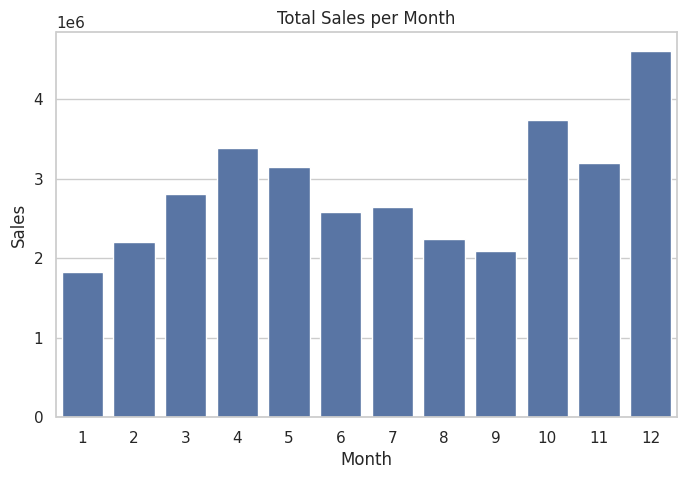

In [ ]:
monthly_sales = new_df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# Best Selling Product by quantity

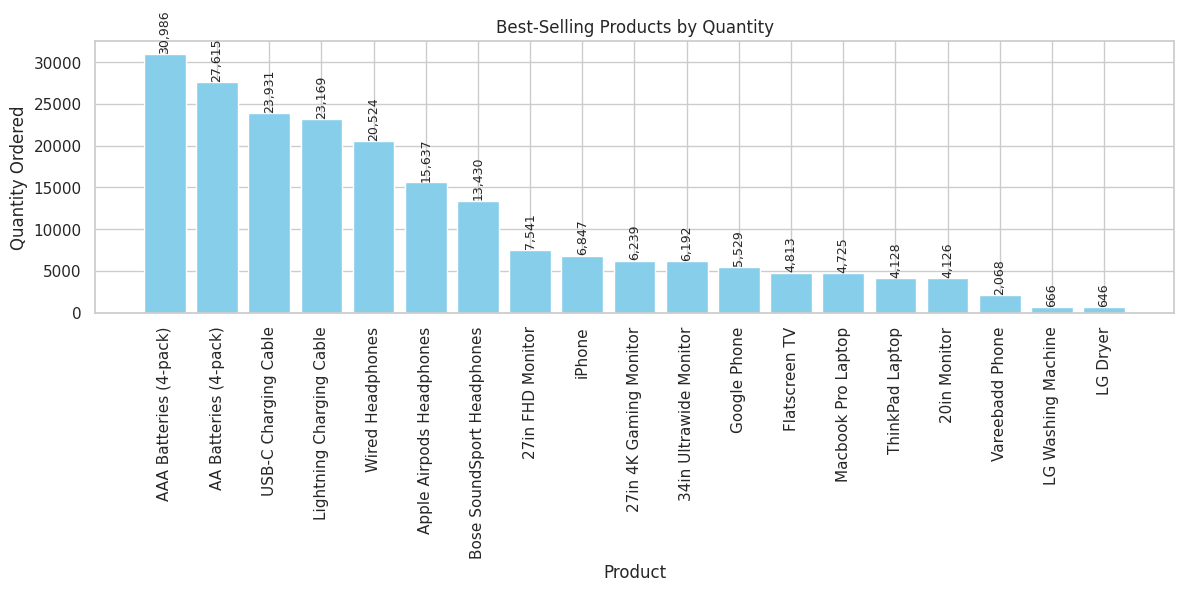

In [ ]:
# Group and sort product sales
product_sales = new_df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(product_sales.index, product_sales.values, color='skyblue')

# Add quantity labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100,  # adjust +100 as needed
             f'{int(height):,}', ha='center', va='bottom', fontsize=9, rotation=90)

plt.title('Best-Selling Products by Quantity')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# How does sales vary by hour?

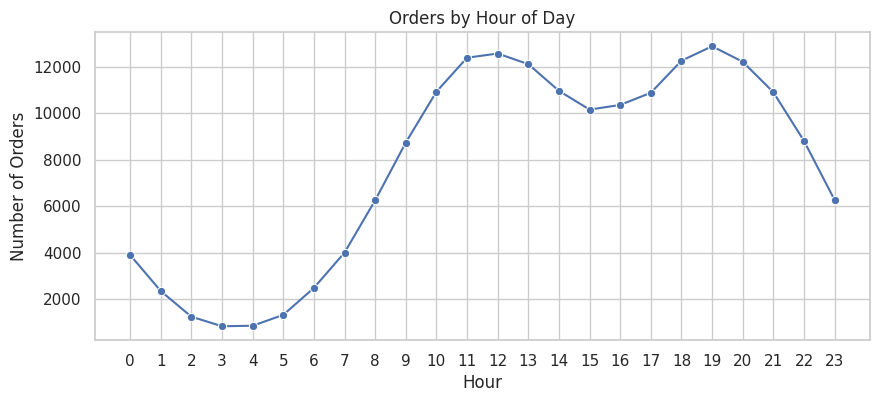

In [ ]:
hourly_orders = new_df.groupby('Hour')['Order ID'].count()

plt.figure(figsize=(10,4))
sns.lineplot(x=hourly_orders.index, y=hourly_orders.values, marker='o')
plt.title('Orders by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

#Which day of the week has most orders

/tmp/ipython-input-3363483405.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=weekday_order_counts.index, y=weekday_order_counts.values, palette='coolwarm')


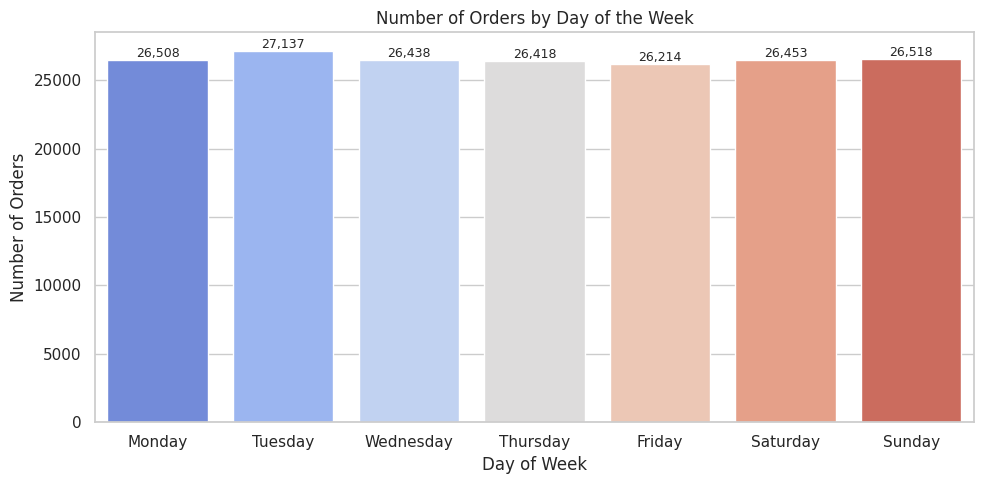

In [ ]:
weekday_order_counts = new_df['Day Name'].value_counts()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_order_counts = weekday_order_counts.reindex(ordered_days)
plt.figure(figsize=(10, 5))
bars = sns.barplot(x=weekday_order_counts.index, y=weekday_order_counts.values, palette='coolwarm')

for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{int(height):,}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center', va='bottom', fontsize=9)

plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

# What is the sales trend over the year

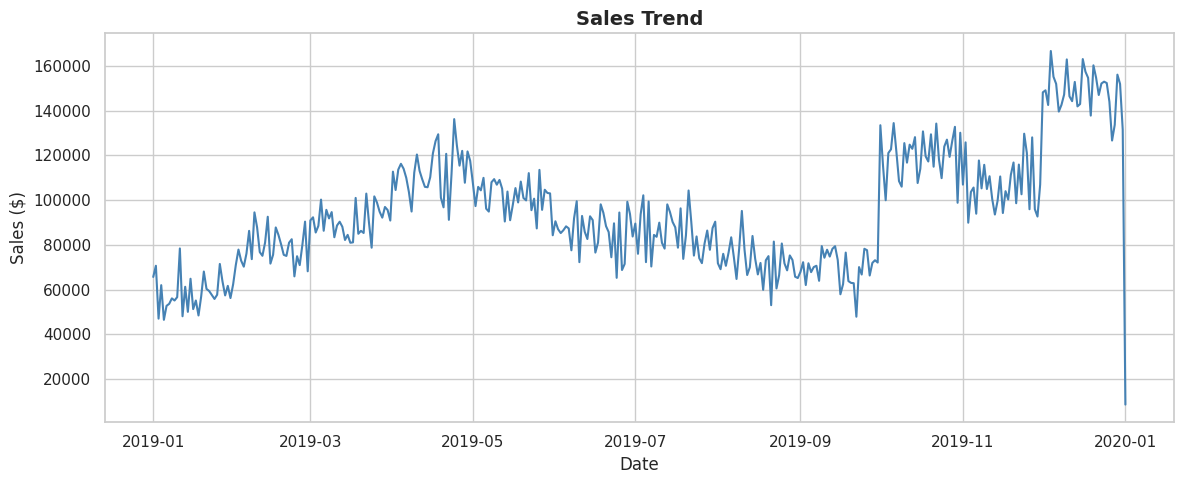

In [ ]:
# Changing Order Date to datetime format
new_df['Order Date'] = pd.to_datetime(new_df['Order Date'], errors='coerce')

# Group by date and sum sales
daily_sales = new_df.groupby(new_df['Order Date'].dt.date)['Sales'].sum()

# Plot
plt.figure(figsize=(12,5))
daily_sales.plot(color='steelblue')
plt.title('Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.tight_layout()
plt.show()


# Average order value by state

/tmp/ipython-input-2954207534.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_avg_order = new_df.groupby('State').apply(


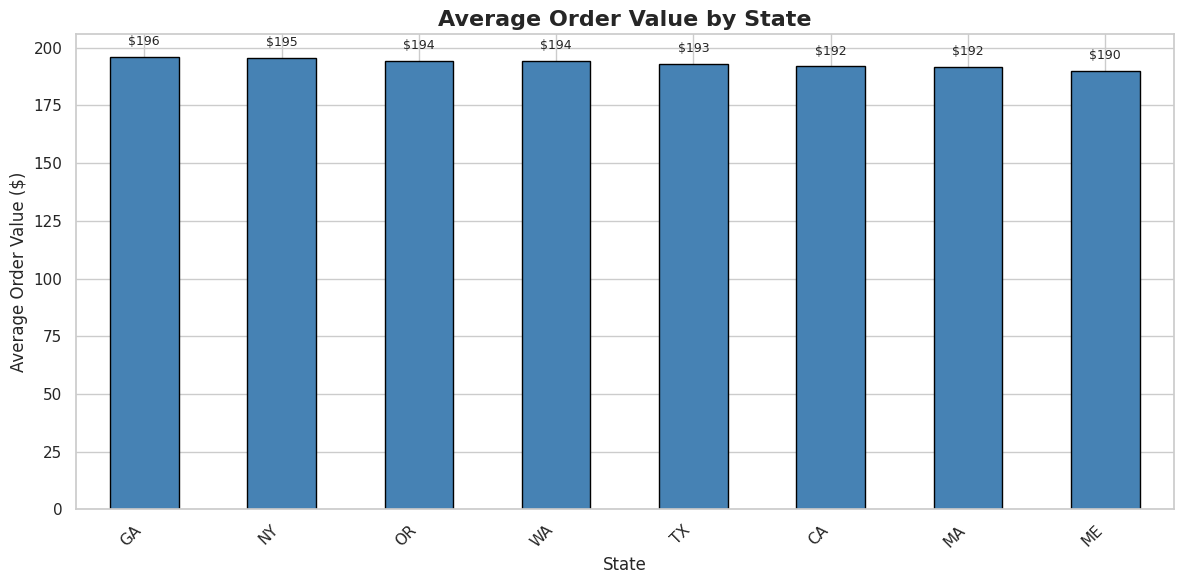

In [ ]:
# Calculate average order value by state
state_avg_order = new_df.groupby('State').apply(
    lambda x: x['Sales'].sum() / x['Order ID'].nunique()
)

# Sort values
state_avg_order = state_avg_order.sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
bars = state_avg_order.plot(kind='bar', color='steelblue', edgecolor='black')

# Add value labels on top of bars
for i, val in enumerate(state_avg_order.values):
    plt.text(i, val + (0.02 * val), f"${val:,.0f}",
             ha='center', va='bottom', fontsize=9)

# Titles & labels
plt.title("Average Order Value by State", fontsize=16, fontweight='bold')
plt.xlabel("State", fontsize=12)
plt.ylabel("Average Order Value ($)", fontsize=12)

# Rotate x labels for readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Frequently bought together(e.g. combo)

In [ ]:
from itertools import combinations
from collections import Counter

# Filter orders with same Order ID
df_dupe = new_df[new_df.duplicated('Order ID', keep=False)]

# Group by Order ID and join products
df_dupe['Grouped'] = df_dupe.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_dupe = df_dupe[['Order ID', 'Grouped']].drop_duplicates()

# Count combinations
count = Counter()

for row in df_dupe['Grouped']:
    products = row.split(',')
    combinations_ = combinations(sorted(products), 2)
    count.update(combinations_)

# Display top 10 combinations
print("Top 10 product combinations frequently bought together:")
for combo, freq in count.most_common(10):
    print(f"{combo}: {freq}")

Top 10 product combinations frequently bought together:
('Lightning Charging Cable', 'iPhone'): 1011
('Google Phone', 'USB-C Charging Cable'): 997
('Wired Headphones', 'iPhone'): 462
('Google Phone', 'Wired Headphones'): 422
('Apple Airpods Headphones', 'iPhone'): 373
('USB-C Charging Cable', 'Vareebadd Phone'): 368
('Bose SoundSport Headphones', 'Google Phone'): 228
('USB-C Charging Cable', 'Wired Headphones'): 203
('Vareebadd Phone', 'Wired Headphones'): 149
('Lightning Charging Cable', 'Wired Headphones'): 129


/tmp/ipython-input-388258116.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dupe['Grouped'] = df_dupe.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


# Most Profitable Product(by Revenue)

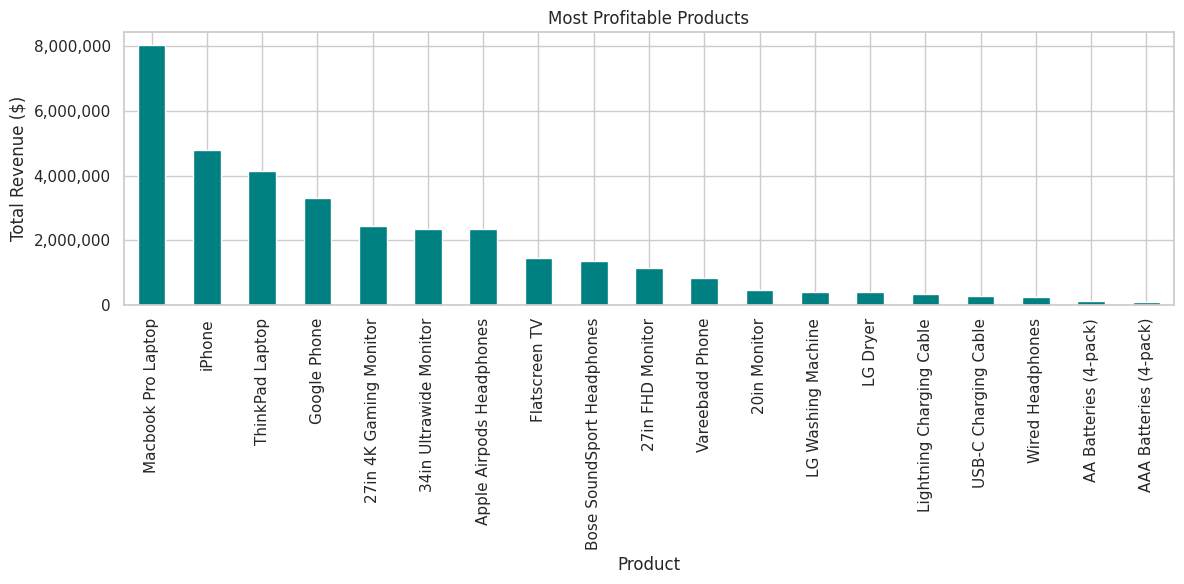

In [ ]:
revenue_by_product = new_df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
revenue_by_product.plot(kind='bar', color='teal')
plt.title('Most Profitable Products')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

# Heatmap of Sales by Hour and Weekday

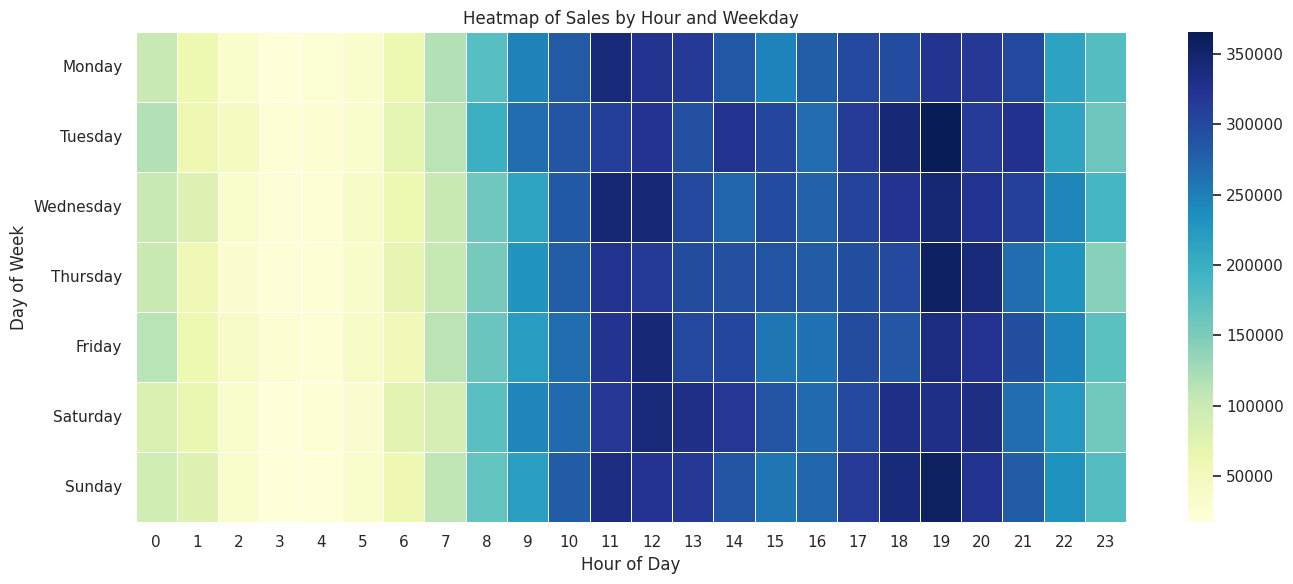

In [ ]:
# Create pivot table
heatmap_data = new_df.pivot_table(index=new_df['Order Date'].dt.day_name(),
                                   columns='Hour',
                                   values='Sales',
                                   aggfunc='sum').reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Sales by Hour and Weekday')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

# Weekday and Weekday Sales

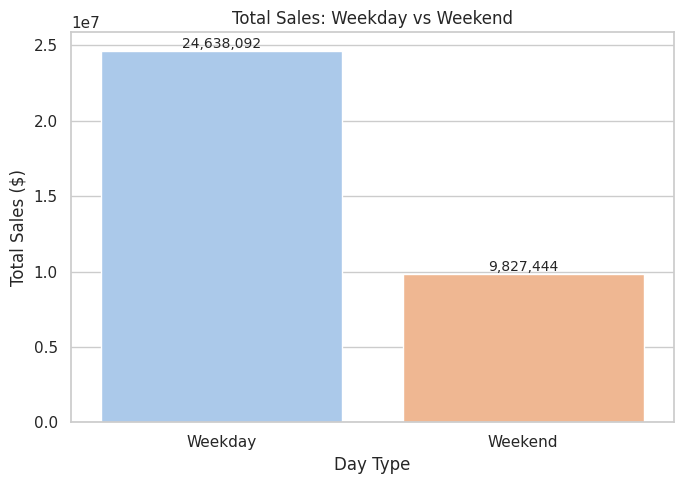

Total Sales:
Day Type
Weekday    $24,638,092.96
Weekend     $9,827,444.98
Name: Sales, dtype: object


In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Create Weekday column if not already
new_df['Weekday'] = new_df['Order Date'].dt.day_name()

#Label as 'Weekday' or 'Weekend'
def label_day(day):
    return 'Weekend' if day in ['Saturday', 'Sunday'] else 'Weekday'

new_df['Day Type'] = new_df['Weekday'].apply(label_day)

#Group by Day Type
sales_by_daytype = new_df.groupby('Day Type')['Sales'].sum()
avg_order_by_daytype = new_df.groupby('Day Type')['Sales'].mean()

#Plot total sales
plt.figure(figsize=(7, 5))
sns.barplot(x=sales_by_daytype.index, y=sales_by_daytype.values, palette='pastel')
plt.title('Total Sales: Weekday vs Weekend')
plt.ylabel('Total Sales ($)')
plt.xlabel('Day Type')

# Add labels on top
for i, val in enumerate(sales_by_daytype.values):
    plt.text(i, val + 10000, f'{int(val):,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#Print Summary Stats
print("Total Sales:")
print(sales_by_daytype.apply(lambda x: f"${x:,.2f}"))

# Most expensive and least expensive product in our inventory

In [ ]:
# Get unique price per product
product_prices = new_df[['Product', 'Price Each']].drop_duplicates().set_index('Product')

# Sort
most_expensive = product_prices.sort_values(by='Price Each', ascending=False).head(5)
least_expensive = product_prices.sort_values(by='Price Each', ascending=True).head(5)

print("💸 Most Expensive Products:")
print(most_expensive)

print("\n💵 Least Expensive Products:")
print(least_expensive)

💸 Most Expensive Products:
                    Price Each
Product                       
Macbook Pro Laptop     1700.00
ThinkPad Laptop         999.99
iPhone                  700.00
LG Dryer                600.00
LG Washing Machine      600.00

💵 Least Expensive Products:
                          Price Each
Product                             
AAA Batteries (4-pack)          2.99
AA Batteries (4-pack)           3.84
USB-C Charging Cable           11.95
Wired Headphones               11.99
Lightning Charging Cable       14.95


# Heatmap of Monthly Popular Products

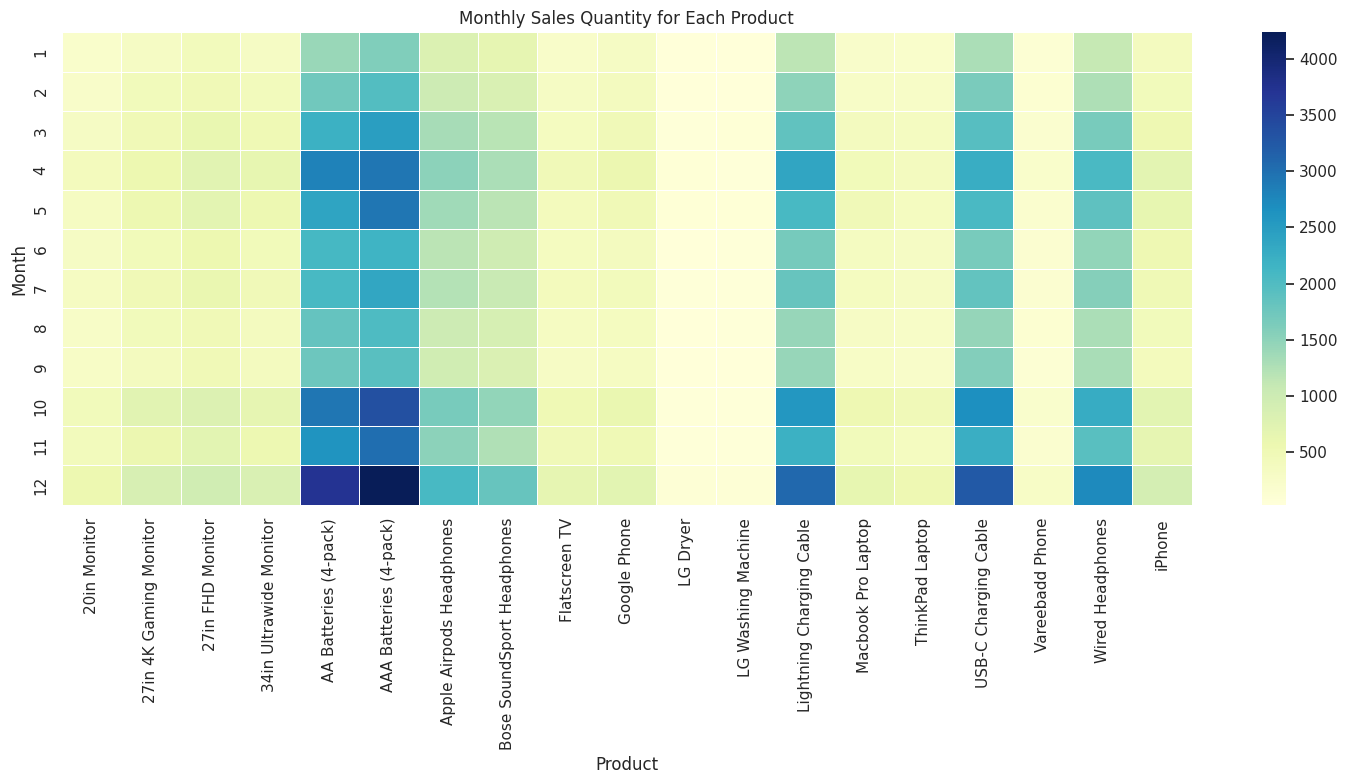

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Pivot table (Month x Product) with quantity sold
monthly_product_sales = new_df.pivot_table(
    index='Month',
    columns='Product',
    values='Quantity Ordered',
    aggfunc='sum',
    fill_value=0
)
#Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(monthly_product_sales, cmap='YlGnBu', annot=False, linewidths=0.5)
plt.title('Monthly Sales Quantity for Each Product')
plt.ylabel('Month')
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**“The heatmap shows how different products perform across the months. Based on the top 5 analysis, products like AAA Batteries (4-pack) and Lightning Charging Cable consistently appear in the top sellers every month — indicating strong, steady demand.”**

# Customer distribution by City

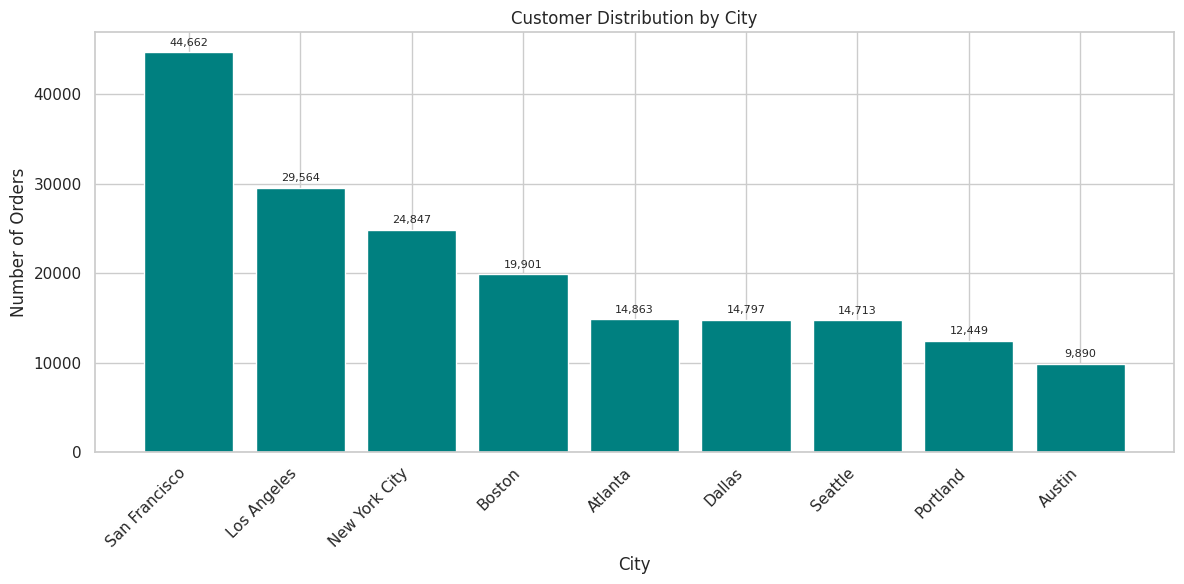

In [ ]:
# Count of orders per city
city_counts = new_df['City'].value_counts().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(12,6))
bars = plt.bar(city_counts.index, city_counts.values, color='teal')
plt.xticks(rotation=45, ha='right')
plt.title('Customer Distribution by City')
plt.ylabel('Number of Orders')
plt.xlabel('City')

# Add values on top
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
             f'{int(bar.get_height()):,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Top 10 states by number of orders

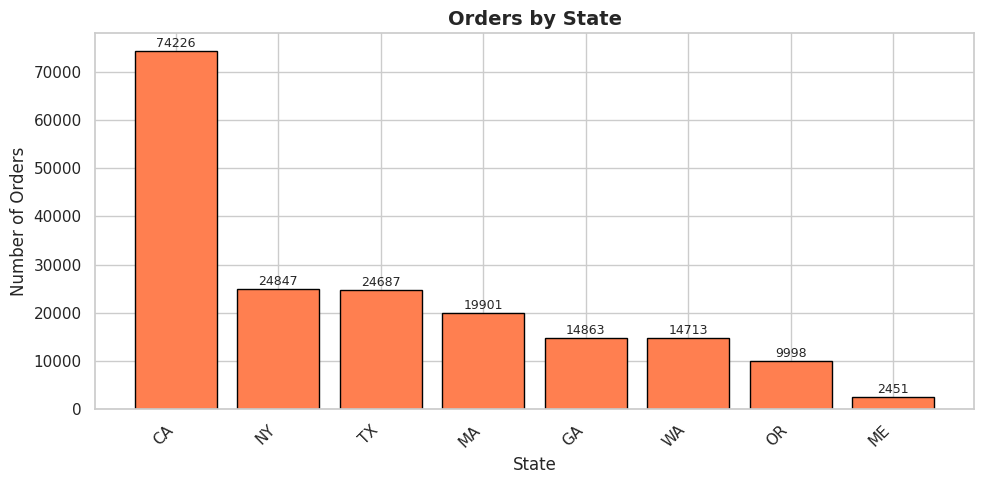

In [ ]:
state_counts = new_df['State'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,5))
bars = plt.bar(state_counts.index, state_counts.values, color='coral', edgecolor='black')

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 200,
             str(int(height)), ha='center', va='bottom', fontsize=9)

plt.title('Orders by State', fontsize=14, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Most ordered products in top cities

In [ ]:
# Group by city and product, get total quantity ordered
city_product = new_df.groupby(['City', 'Product'])['Quantity Ordered'].sum().reset_index()

# Top product per city
top_product_city = city_product.sort_values(['City', 'Quantity Ordered'], ascending=[True, False])
top_product_per_city = top_product_city.groupby('City').first()

print("Top Selling Product by City:")
print(top_product_per_city)

Top Selling Product by City:
                              Product  Quantity Ordered
City                                                   
Atlanta        AAA Batteries (4-pack)              2358
Austin         AAA Batteries (4-pack)              1668
Boston         AAA Batteries (4-pack)              3458
Dallas         AAA Batteries (4-pack)              2500
Los Angeles    AAA Batteries (4-pack)              4958
New York City  AAA Batteries (4-pack)              4119
Portland       AAA Batteries (4-pack)              2078
San Francisco  AAA Batteries (4-pack)              7404
Seattle        AAA Batteries (4-pack)              2443


# Cities and the number of every products people ordered"

In [ ]:
product_city_quantity = new_df.groupby(['City', 'Product'])['Quantity Ordered'].sum().unstack().fillna(0)

# Display top rows
product_city_quantity.head()

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
City,,,,,,,,,,,,,,,,,,,
Atlanta,341,492,587,482,2193,2358,1266,1082,406,451,59,52,1874,379,357,1912,173,1576,544
Austin,230,317,358,328,1422,1668,884,707,241,274,55,26,1305,251,210,1249,108,1127,377
Boston,394,675,797,670,3011,3458,1651,1411,553,592,59,72,2482,479,447,2555,214,2222,752
Dallas,342,481,587,512,2260,2500,1193,1058,420,461,44,51,1862,381,345,1849,178,1664,519
Los Angeles,658,1003,1222,955,4434,4958,2468,2121,727,848,116,105,3765,750,640,3776,317,3266,1118


#Demand of different products in different cities

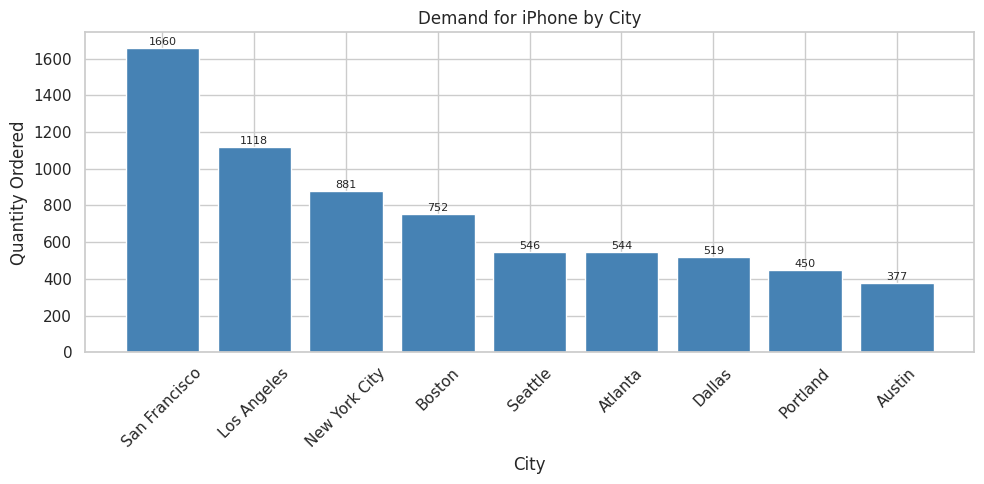

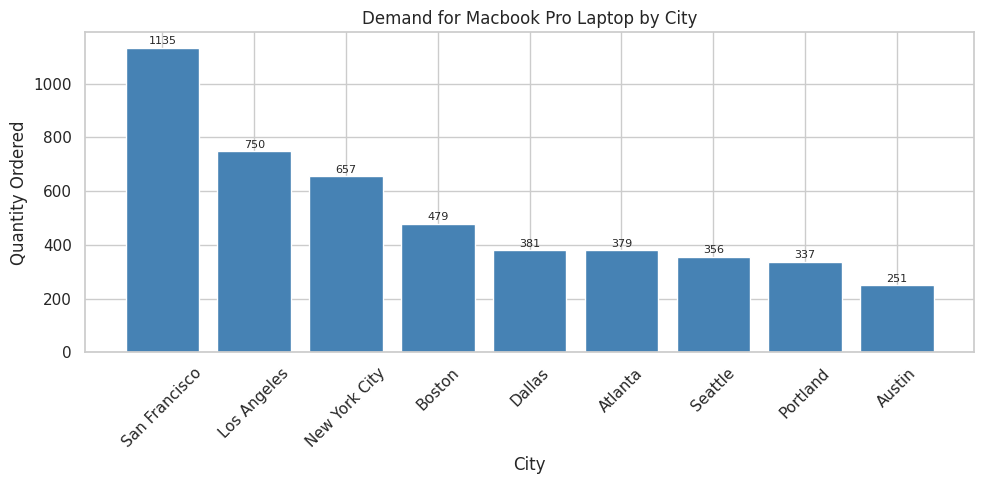

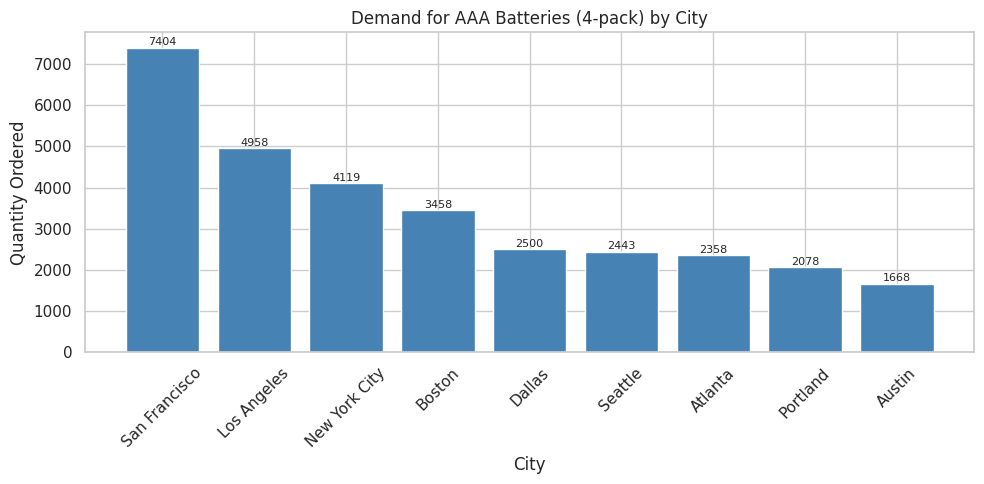

In [ ]:
top_products = ['iPhone', 'Macbook Pro Laptop', 'AAA Batteries (4-pack)']

for product in top_products:
    product_demand = new_df[new_df['Product'] == product].groupby('City')['Quantity Ordered'].sum()
    product_demand = product_demand.sort_values(ascending=False)

    plt.figure(figsize=(10,5))
    bars = plt.bar(product_demand.index, product_demand.values, color='steelblue')
    plt.title(f'Demand for {product} by City')
    plt.xlabel('City')
    plt.ylabel('Quantity Ordered')
    plt.xticks(rotation=45)

    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                 int(bar.get_height()), ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()
